<a href="https://colab.research.google.com/github/aeidablu/aeidablu/blob/main/FREIGHT_COST_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2  # Import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 9964 non-null   object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

# Convert data types of columns

In [3]:
df[['Weight (Kilograms)','Freight Cost (USD)']]=df[['Weight (Kilograms)','Freight Cost (USD)']].apply(pd.to_numeric,errors='coerce')


In [ ]:
# columns with datetime, altough we do not need these columns as we are not going to perform the time series analysis
df[['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']]=df[['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']].apply(pd.to_datetime,errors='coerce')

In [ ]:
print(df.dtypes)

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

In [ ]:
# Show null values of each column
null_values = df.isnull().sum()
print(null_values)

In [ ]:
# Calculate the percentage of null values of each columns
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

<Axes: >

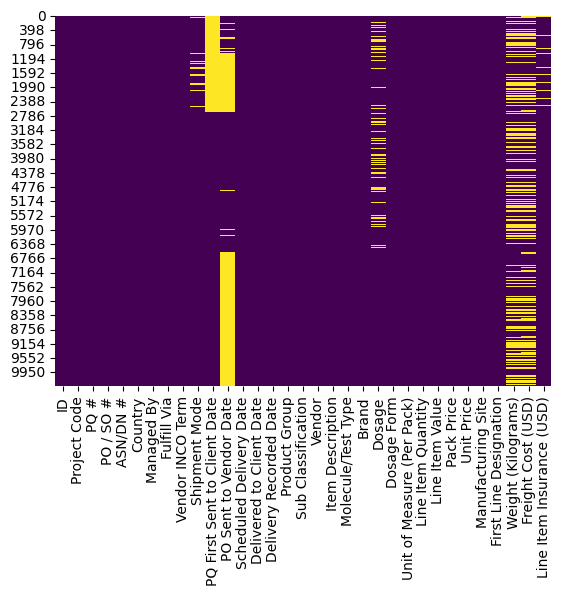

In [ ]:
# Visualizing null values

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [5]:
# Understanding numerical features
numerical_columns = []
for column in df.columns:
    if (df[column].dtype != 'object') and (df[column].dtype != 'datetime64[ns]'):
        numerical_columns.append(column)
numerical_columns

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

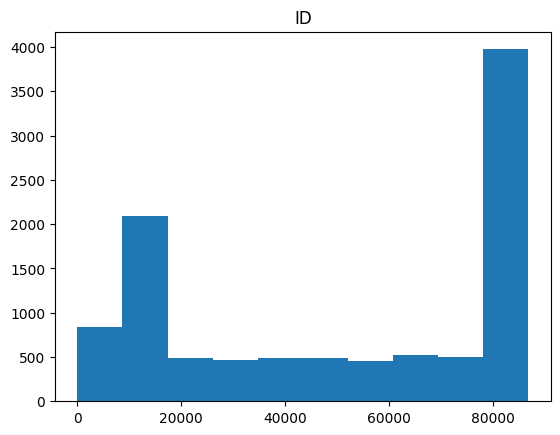

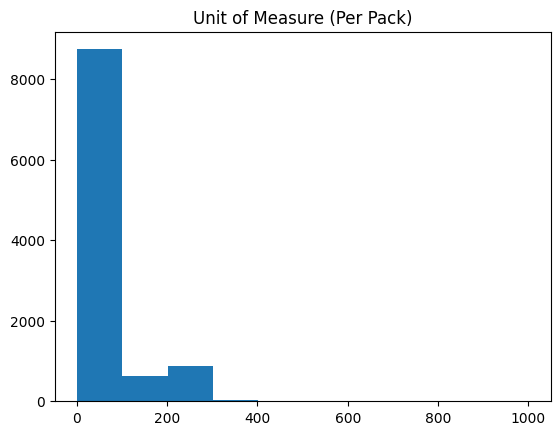

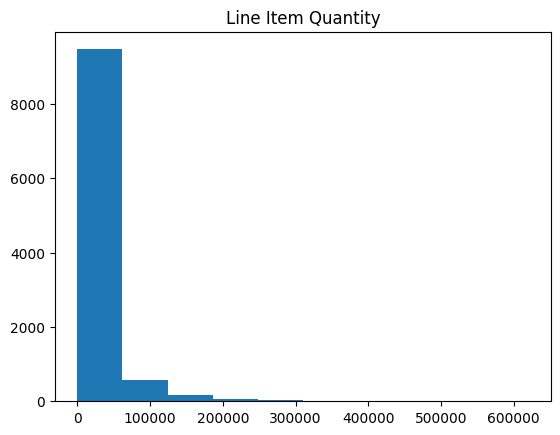

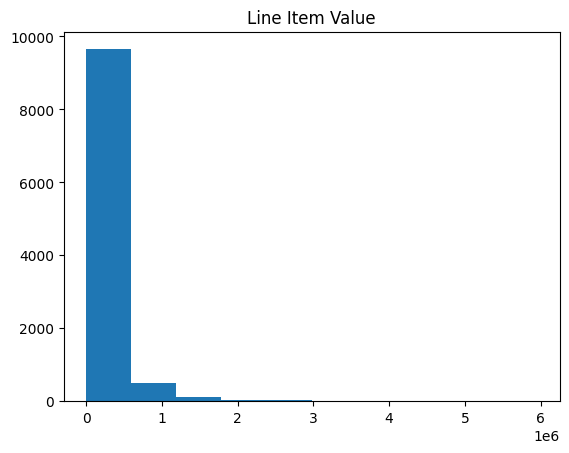

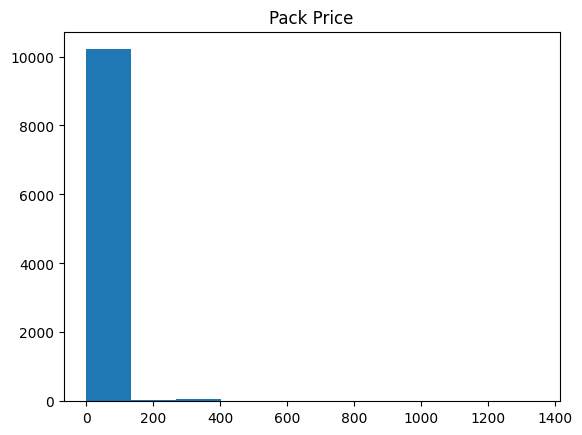

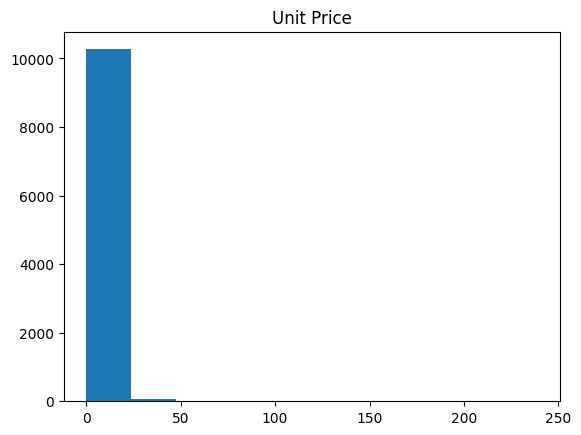

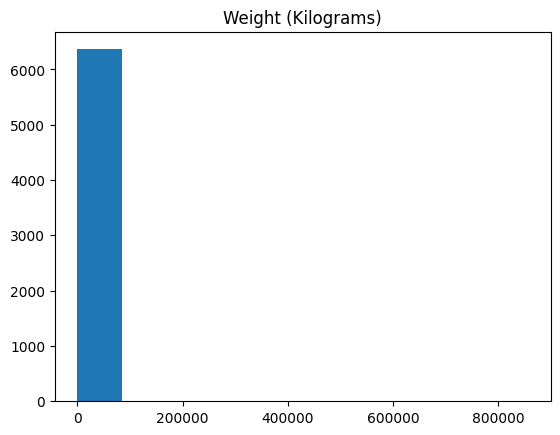

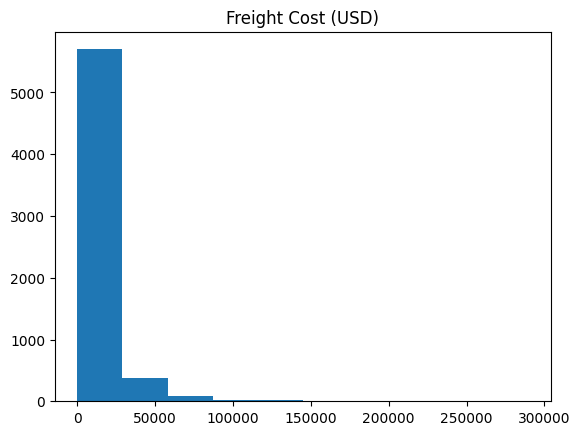

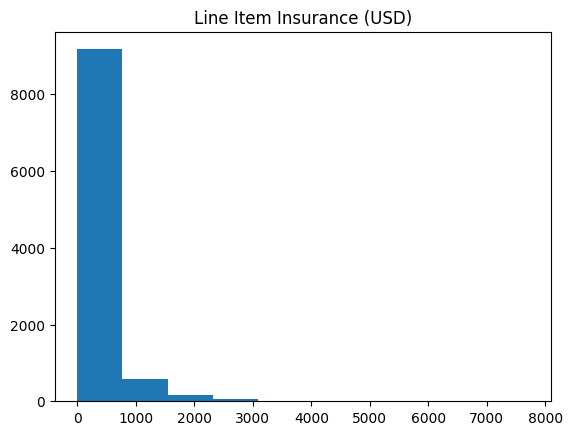

In [ ]:
# Histogram of numerical columns
for column in numerical_columns:
    plt.hist(df[column], bins=10)
    plt.title(column)
    plt.show()

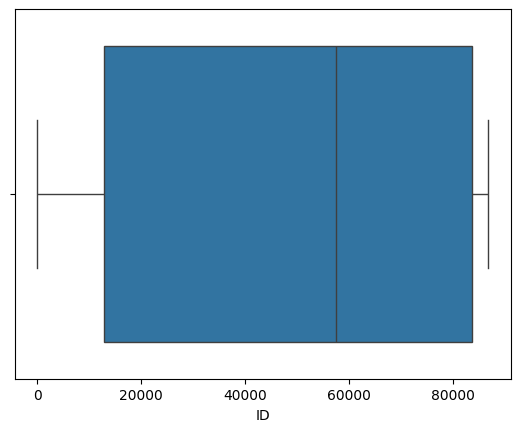

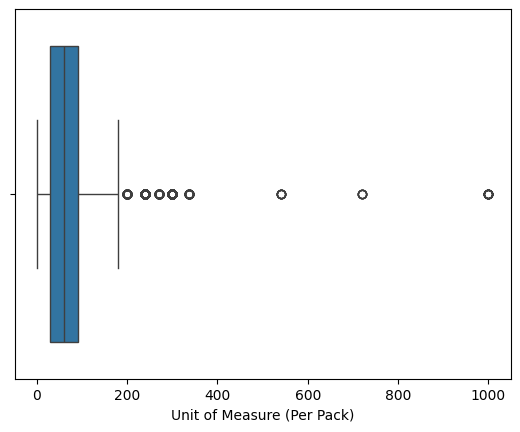

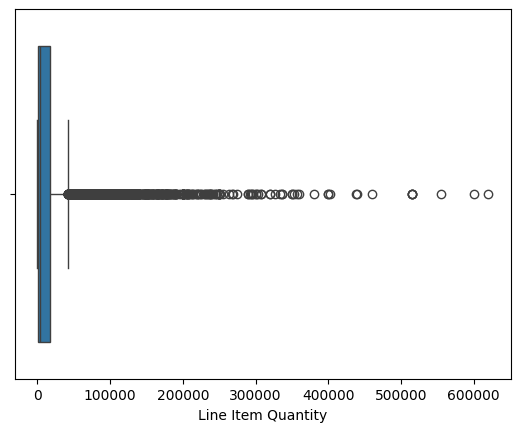

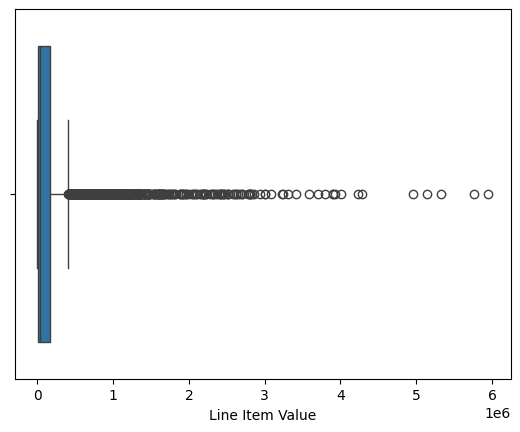

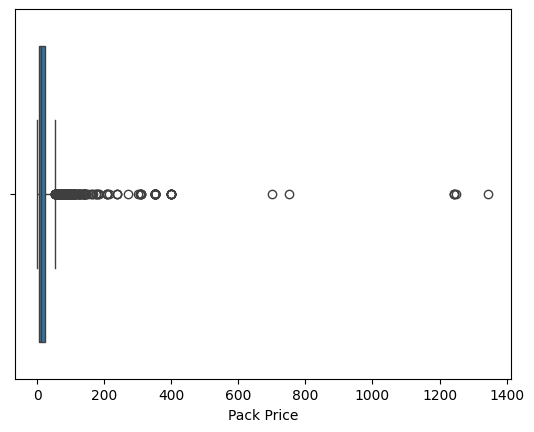

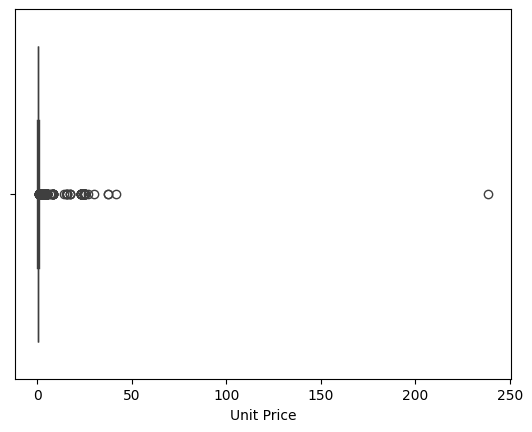

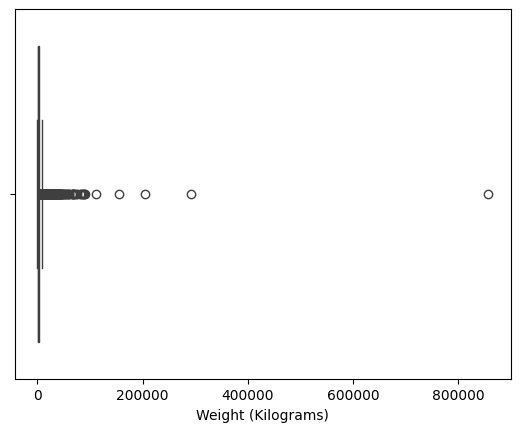

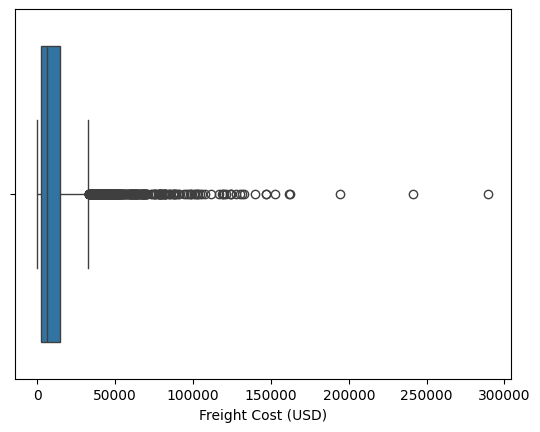

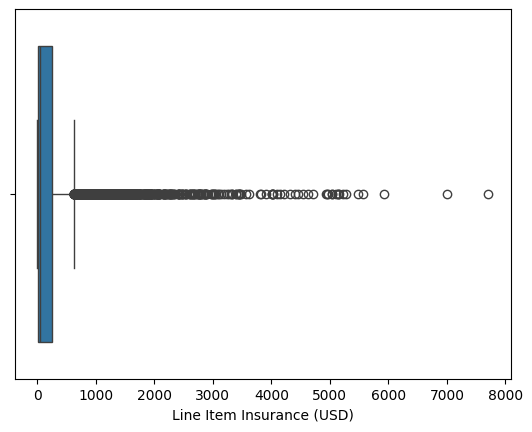

In [ ]:
# Check the outliers
for column in numerical_columns:
    sns.boxplot(x = df[column])
    plt.xlabel(column)
    plt.show()

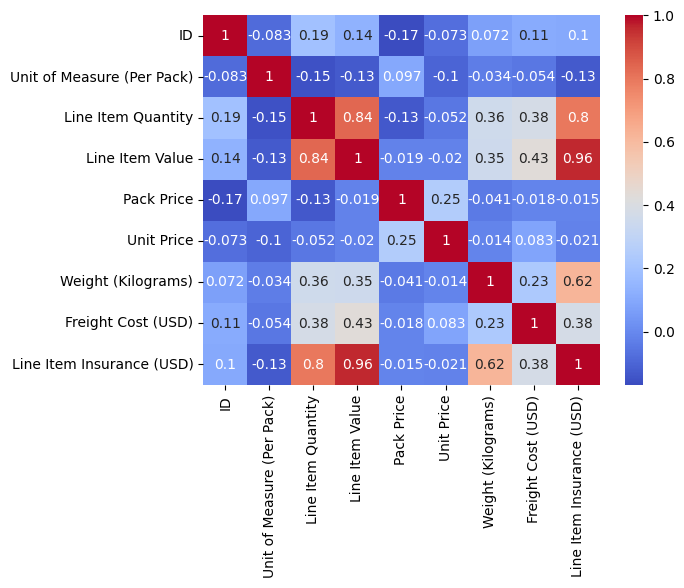

In [6]:
# Find the correlation
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Categorical Variable

In [7]:
# If the number of unique term is less than 10 then the column is categorical column

categorical_columns = []
for column in df.columns:
    if df[column].unique().size < 10:
        categorical_columns.append(column)
    else:
        continue


categorical_columns

['Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'First Line Designation']

In [8]:
print(f"Number of unique categories in each column")
for column in categorical_columns:
    print(column,":", df[column].unique().size, "\n")


Number of unique categories in each column
Managed By : 4 

Fulfill Via : 2 

Vendor INCO Term : 8 

Shipment Mode : 5 

Product Group : 5 

Sub Classification : 6 

First Line Designation : 2 



feature name: Managed By 
 unique elements of this column are: ['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']


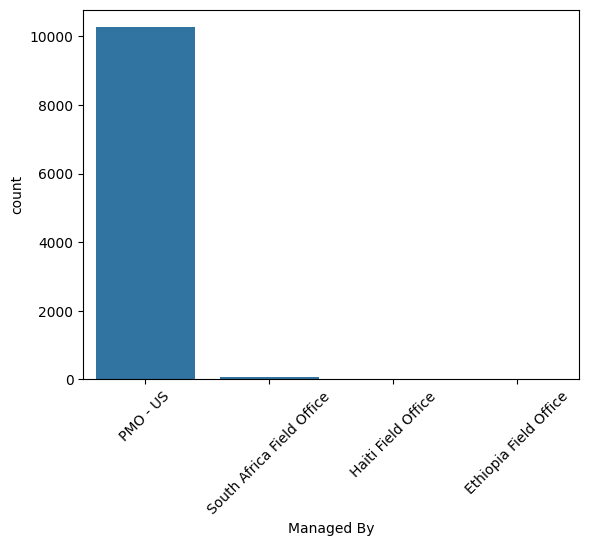





feature name: Fulfill Via 
 unique elements of this column are: ['Direct Drop' 'From RDC']


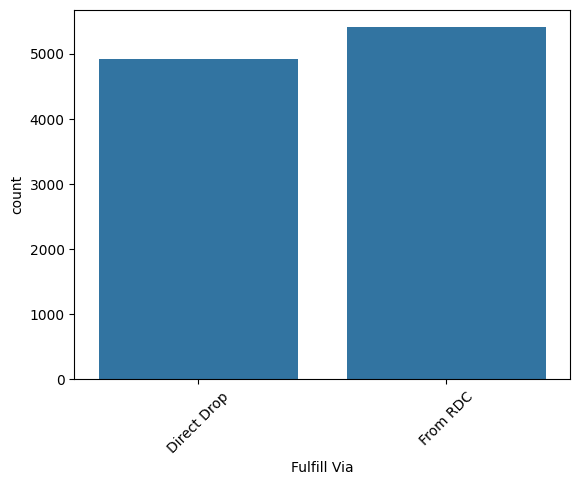





feature name: Vendor INCO Term 
 unique elements of this column are: ['EXW' 'FCA' 'DDU' 'CIP' 'DDP' 'CIF' 'N/A - From RDC' 'DAP']


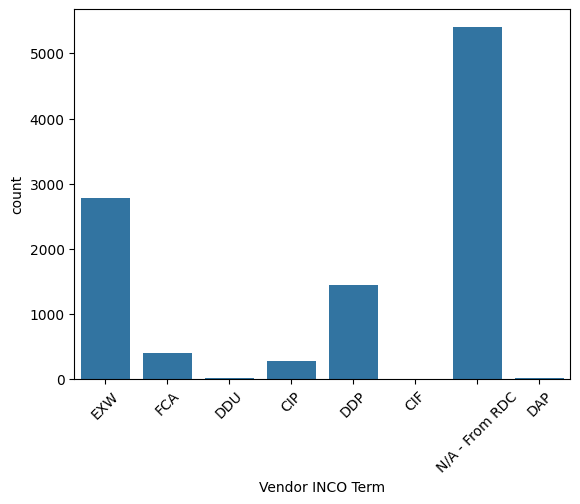





feature name: Shipment Mode 
 unique elements of this column are: ['Air' nan 'Truck' 'Air Charter' 'Ocean']


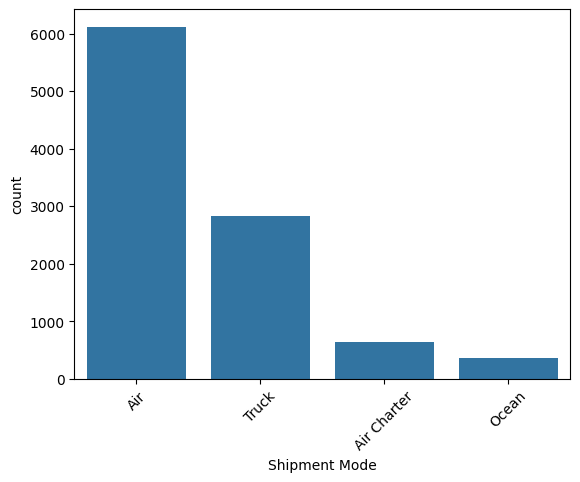





feature name: Product Group 
 unique elements of this column are: ['HRDT' 'ARV' 'ACT' 'MRDT' 'ANTM']


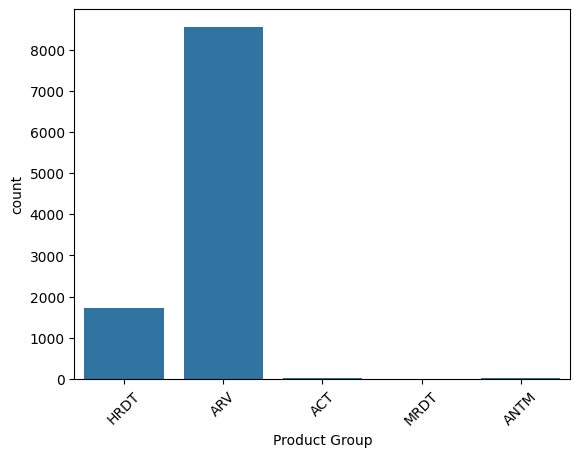





feature name: Sub Classification 
 unique elements of this column are: ['HIV test' 'Pediatric' 'Adult' 'HIV test - Ancillary' 'ACT' 'Malaria']


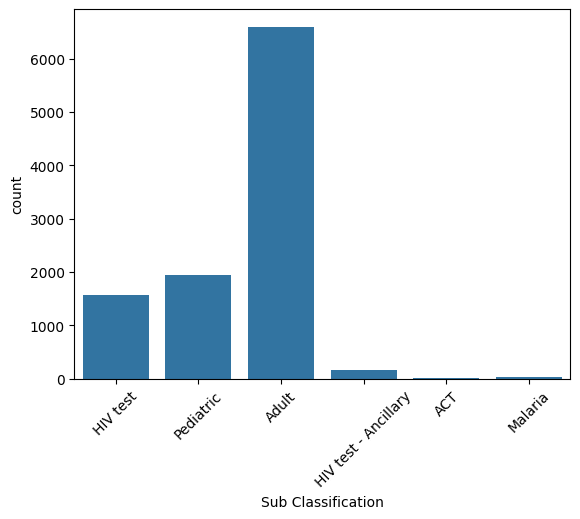





feature name: First Line Designation 
 unique elements of this column are: ['Yes' 'No']


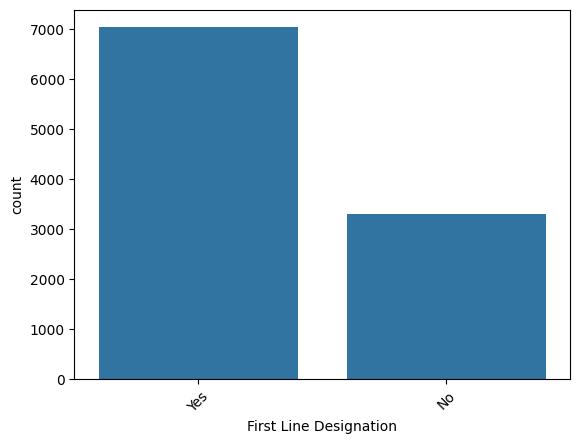

In [ ]:
# show how many time unique element of each categorical column using count plot

for column in categorical_columns:
    print("feature name:", column,  "\n unique elements of this column are:", df[column].unique())
    sns.countplot(x=df[column])
    plt.xlabel(column)
    plt.ylabel("count")
    # Rotate x-axis labels to prevent overlapping
    plt.xticks(rotation=45)  # You can adjust the angle as needed
    plt.show()
    print("\n\n\n")



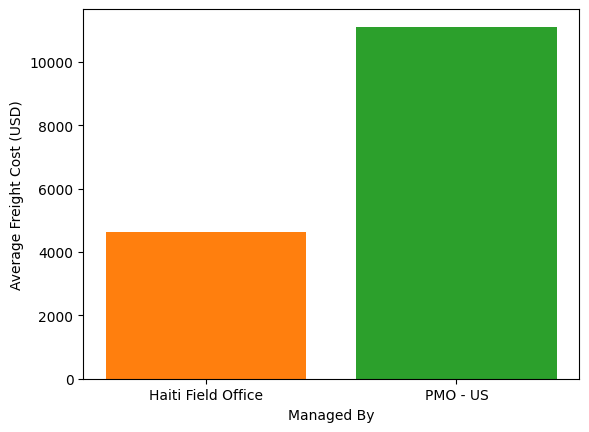

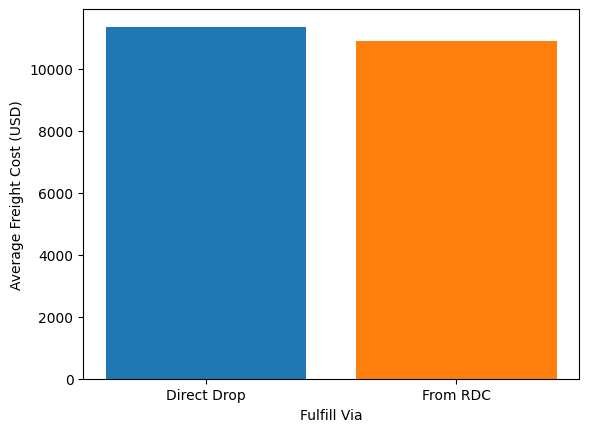

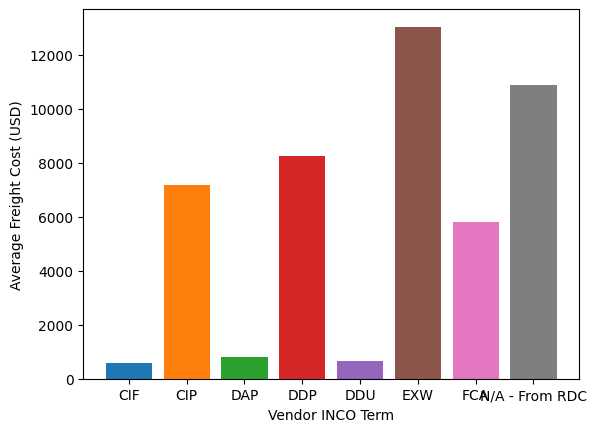

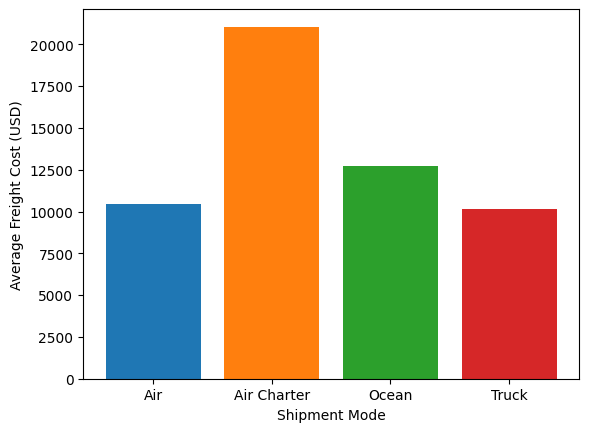

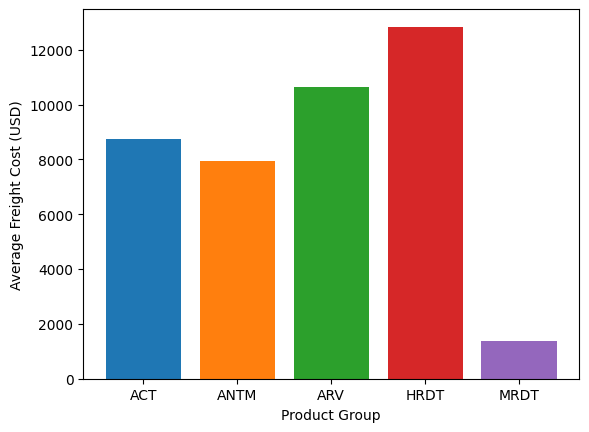

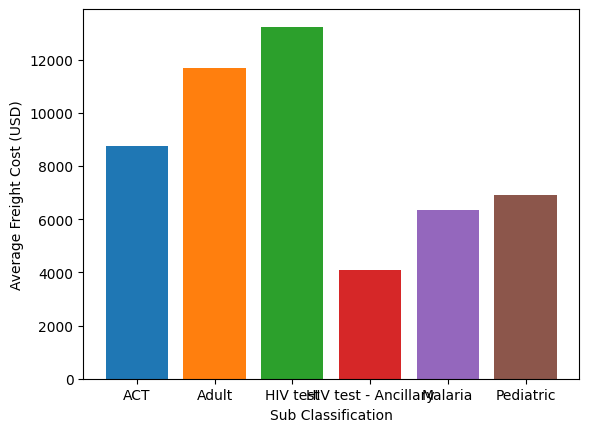

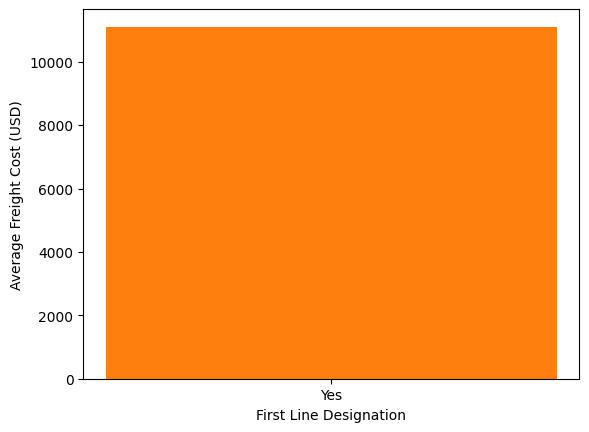

In [9]:
# Average freight cost for each category of categorical column
for column in categorical_columns:
    g = df.groupby(column)
    for name, df1 in g:
      df1['Freight Cost (USD)'] = pd.to_numeric(df1['Freight Cost (USD)'], errors='coerce')
      plt.bar(name, df1['Freight Cost (USD)'].mean())
      plt.ylabel('Average Freight Cost (USD)')
    plt.xlabel(column)
    plt.show()




 The last bar giving only one bar.
 This means the freight cost is not defined where the first line designation is defined as No. Lets see.

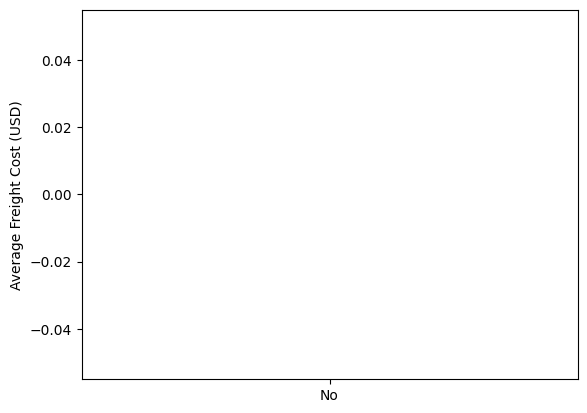

In [10]:
g = df.groupby('First Line Designation')
for name, df1 in g:
  if name == 'No':
    df1['Freight Cost (USD)'] = pd.to_numeric(df1['Freight Cost (USD)'], errors='coerce')
    plt.bar(name, df1['Freight Cost (USD)'].mean())
    plt.ylabel('Average Freight Cost (USD)')

So in First line designation column all the values of null corresponding to No.
We will delete it in the cleaning phase.

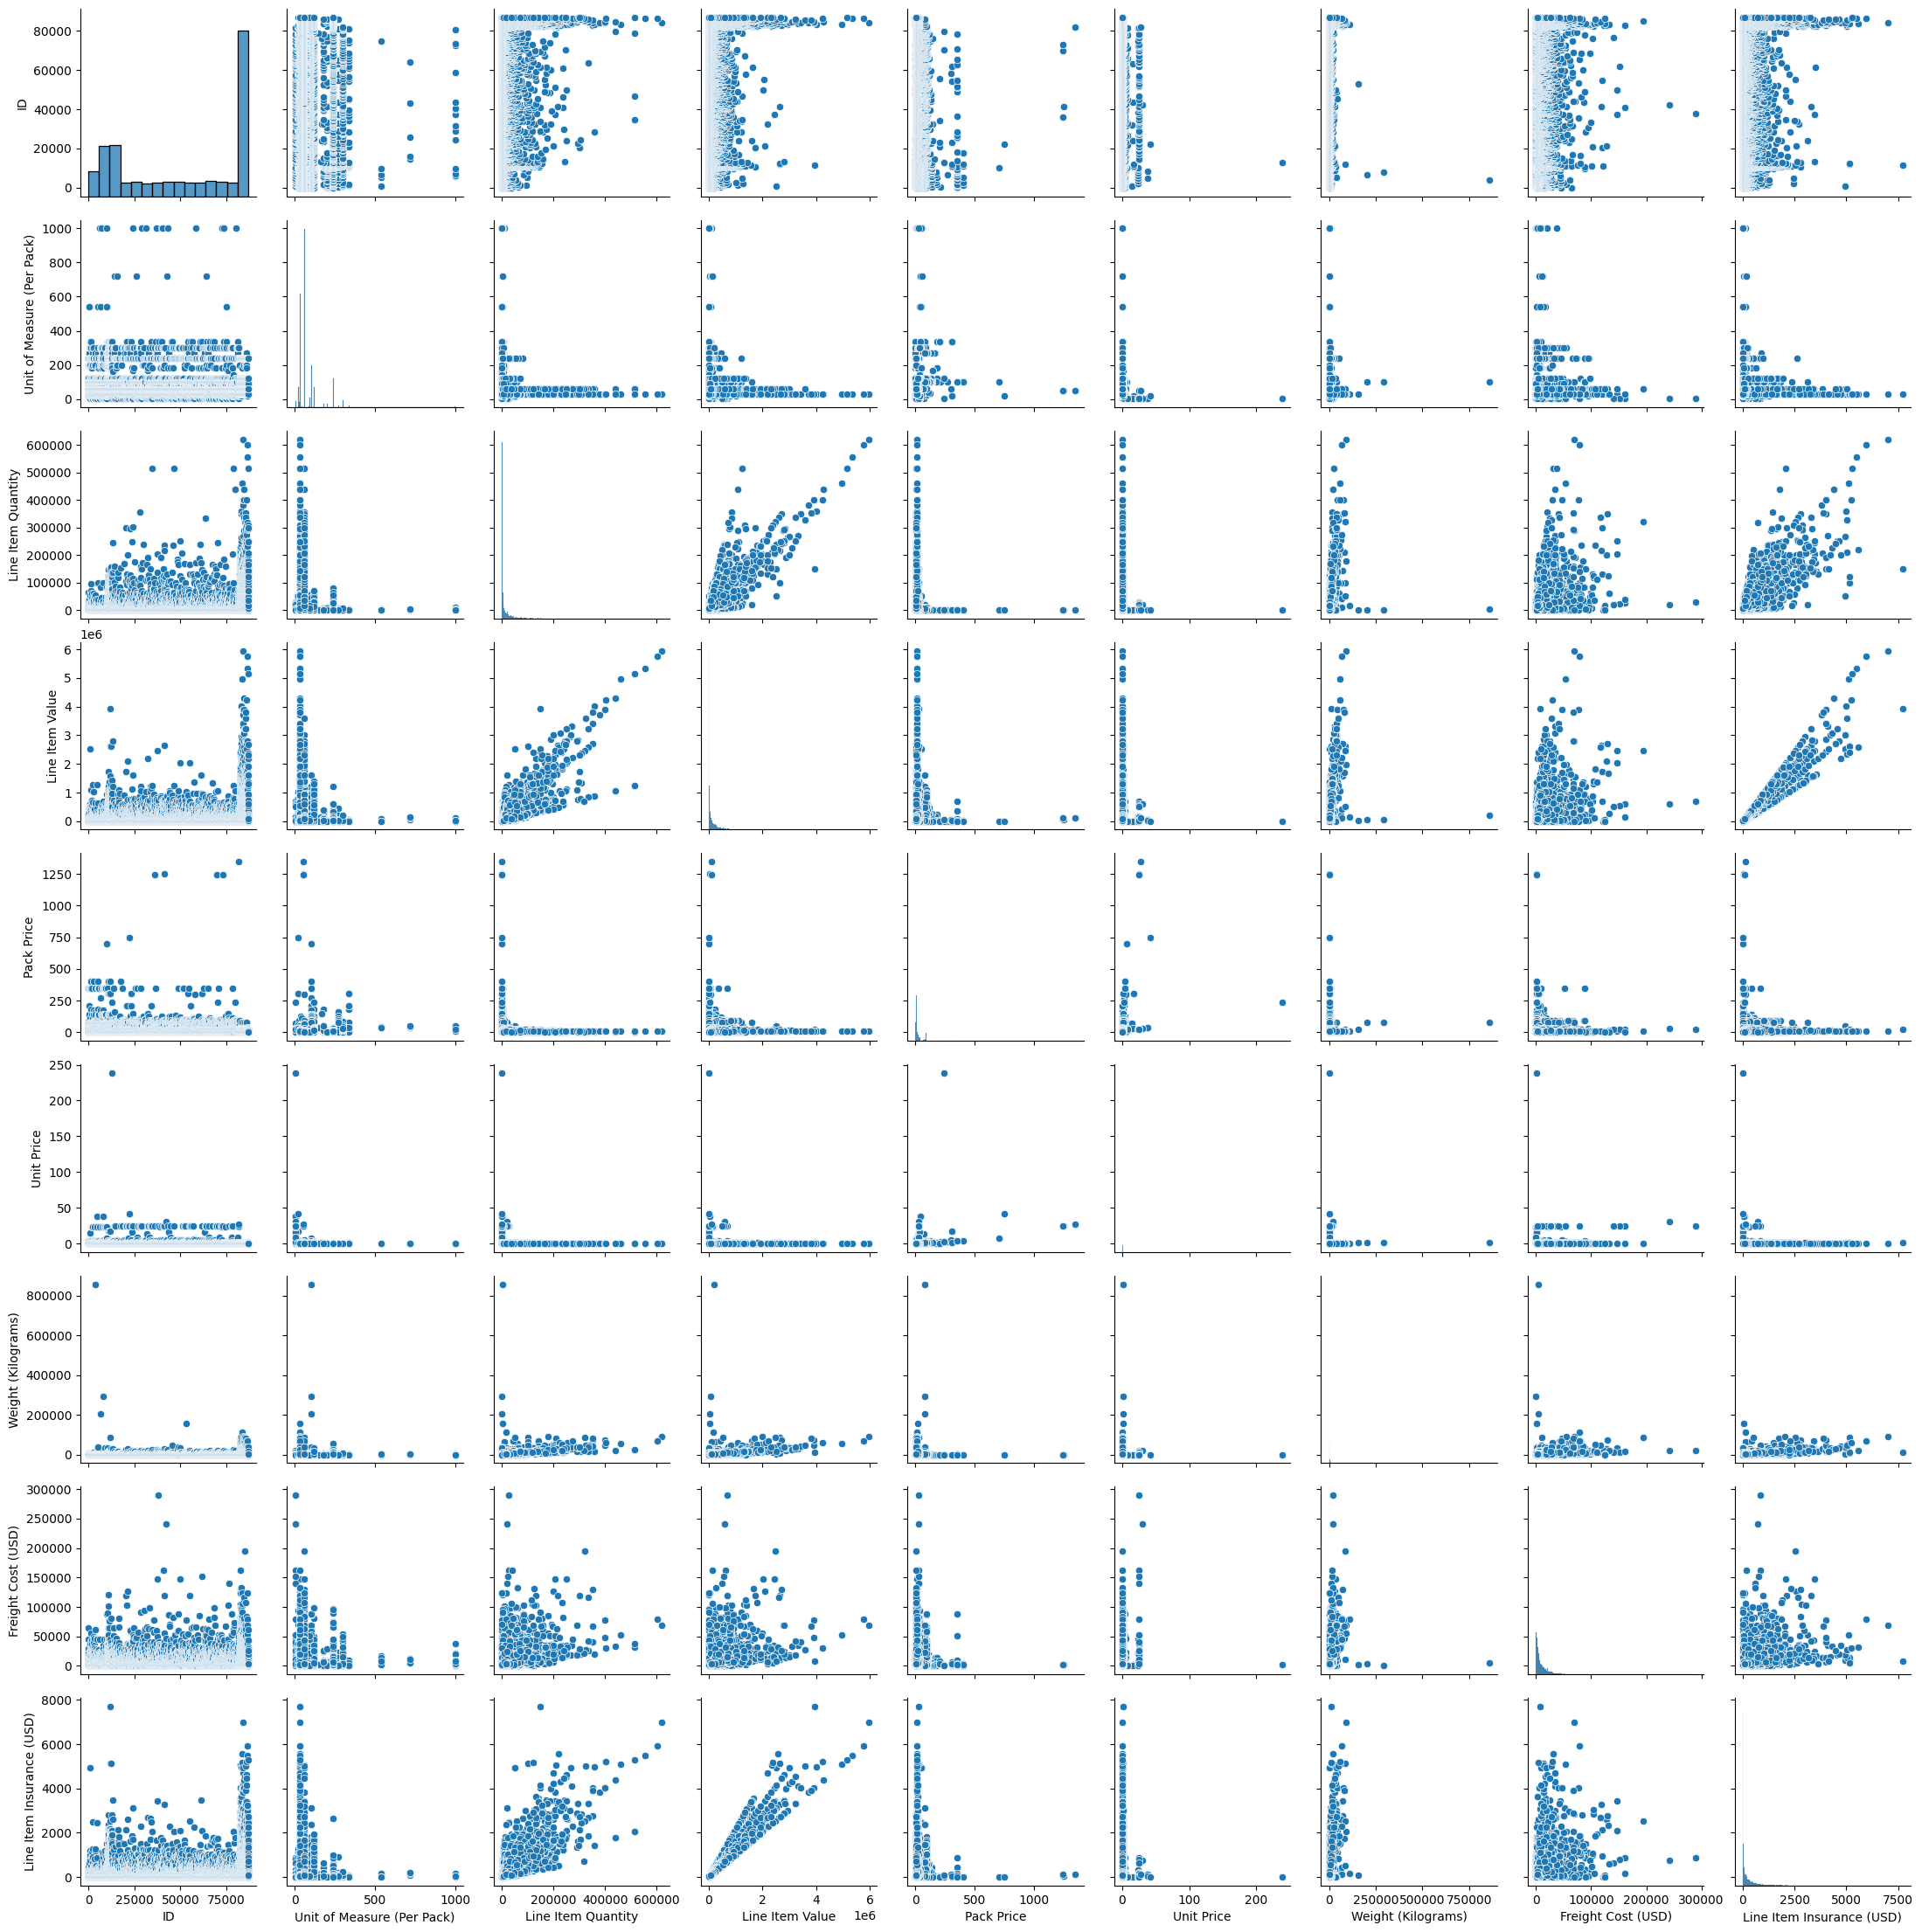

In [11]:
sns.pairplot(df[numerical_columns])

# Data Cleaning

In [12]:
zero_counts = {}  # Initialize an empty dictionary to store counts
for column in df.columns:
    count = (df[column] == 0).sum()
    zero_counts[column] = count  # Store count for the current column

# Print the results
print("\nNumber of zero values in each column:")
for column, count in zero_counts.items():
    print(f"{column}: {count}")


Number of zero values in each column:
ID: 0
Project Code: 0
PQ #: 0
PO / SO #: 0
ASN/DN #: 0
Country: 0
Managed By: 0
Fulfill Via: 0
Vendor INCO Term: 0
Shipment Mode: 0
PQ First Sent to Client Date: 0
PO Sent to Vendor Date: 0
Scheduled Delivery Date: 0
Delivered to Client Date: 0
Delivery Recorded Date: 0
Product Group: 0
Sub Classification: 0
Vendor: 0
Item Description: 0
Molecule/Test Type: 0
Brand: 0
Dosage: 0
Dosage Form: 0
Unit of Measure (Per Pack): 0
Line Item Quantity: 0
Line Item Value: 17
Pack Price: 18
Unit Price: 103
Manufacturing Site: 0
First Line Designation: 0
Weight (Kilograms): 1
Freight Cost (USD): 0
Line Item Insurance (USD): 54


In [13]:
# As observe there are some values that are zero in these two columns so I drop it
df = df.drop(df[df['Weight (Kilograms)'] == 0].index)
df = df.drop(df[df['Line Item Value'] == 0].index)

In [14]:
# Dropping the first line designation
df.drop('First Line Designation', axis=1, inplace=True)

# Handling missing and nan values

In [15]:
# Dropping the columns with null values
df = df.dropna(how = 'all')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10306 entries, 0 to 10323
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10306 non-null  int64         
 1   Project Code                  10306 non-null  object        
 2   PQ #                          10306 non-null  object        
 3   PO / SO #                     10306 non-null  object        
 4   ASN/DN #                      10306 non-null  object        
 5   Country                       10306 non-null  object        
 6   Managed By                    10306 non-null  object        
 7   Fulfill Via                   10306 non-null  object        
 8   Vendor INCO Term              10306 non-null  object        
 9   Shipment Mode                 9946 non-null   object        
 10  PQ First Sent to Client Date  7627 non-null   datetime64[ns]
 11  PO Sent to Vendor Date        458

In [16]:
# Lets drop the categorical variables with too many classes
dropped_categorical = []
for column in df.columns:
    if(len(df[column].unique())>10 and df[column].dtype == 'object'):
        dropped_categorical.append(column)
        df.drop(column, axis=1, inplace=True)

In [17]:
print("Categorical features dropped having too many classes:", dropped_categorical)

Categorical features dropped having too many classes: ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site']


In [18]:
# Dropping id column
df.drop("ID", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10306 entries, 0 to 10323
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Managed By                    10306 non-null  object        
 1   Fulfill Via                   10306 non-null  object        
 2   Vendor INCO Term              10306 non-null  object        
 3   Shipment Mode                 9946 non-null   object        
 4   PQ First Sent to Client Date  7627 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        4582 non-null   datetime64[ns]
 6   Scheduled Delivery Date       10306 non-null  datetime64[ns]
 7   Delivered to Client Date      10306 non-null  datetime64[ns]
 8   Delivery Recorded Date        10306 non-null  datetime64[ns]
 9   Product Group                 10306 non-null  object        
 10  Sub Classification            10306 non-null  object        
 11  Unit of Measure (Per Pack)    103

In [19]:
# Dropping Line item insurance (USD) feature
df.drop("Line Item Insurance (USD)", axis = 1, inplace=True)

In [20]:
# Dropping the columns have no values in the target column "Freight Cost (USD)"
df = df.dropna(subset = ["Freight Cost (USD)"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6185 entries, 0 to 10316
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Managed By                    6185 non-null   object        
 1   Fulfill Via                   6185 non-null   object        
 2   Vendor INCO Term              6185 non-null   object        
 3   Shipment Mode                 5974 non-null   object        
 4   PQ First Sent to Client Date  4615 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        2909 non-null   datetime64[ns]
 6   Scheduled Delivery Date       6185 non-null   datetime64[ns]
 7   Delivered to Client Date      6185 non-null   datetime64[ns]
 8   Delivery Recorded Date        6185 non-null   datetime64[ns]
 9   Product Group                 6185 non-null   object        
 10  Sub Classification            6185 non-null   object        
 11  Unit of Measure (Per Pack)    6185

In [21]:
# Don't need the column having datetime data type as not performing time series forecasting here
df.drop(['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6185 entries, 0 to 10316
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Managed By                  6185 non-null   object 
 1   Fulfill Via                 6185 non-null   object 
 2   Vendor INCO Term            6185 non-null   object 
 3   Shipment Mode               5974 non-null   object 
 4   Product Group               6185 non-null   object 
 5   Sub Classification          6185 non-null   object 
 6   Unit of Measure (Per Pack)  6185 non-null   int64  
 7   Line Item Quantity          6185 non-null   int64  
 8   Line Item Value             6185 non-null   float64
 9   Pack Price                  6185 non-null   float64
 10  Unit Price                  6185 non-null   float64
 11  Weight (Kilograms)          6162 non-null   float64
 12  Freight Cost (USD)          6185 non-null   float64
dtypes: float64(5), int64(2), object(6)
me

In [22]:
# For shipment mode, the missing values fill with the most common mode
df["Shipment Mode"] = df["Shipment Mode"].fillna(df["Shipment Mode"].mode()[0])

In [23]:
# Replacing the null values in column Weight(Kilograms) with the median value
df["Weight (Kilograms)"].fillna(df["Weight (Kilograms)"].median(), inplace=True)

In [24]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6185 entries, 0 to 10316
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unit of Measure (Per Pack)  6185 non-null   int64  
 1   Line Item Quantity          6185 non-null   int64  
 2   Line Item Value             6185 non-null   float64
 3   Pack Price                  6185 non-null   float64
 4   Unit Price                  6185 non-null   float64
 5   Weight (Kilograms)          6185 non-null   float64
 6   Freight Cost (USD)          6185 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 386.6 KB


In [25]:
df_numeric.corr()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD)
Unit of Measure (Per Pack),1.000000,-0.150994,-0.125106,0.122199,-0.103236,-0.033787,-0.053985
Line Item Quantity,-0.150994,1.000000,0.817301,-0.164738,-0.061073,0.352772,0.378593
Line Item Value,-0.125106,0.817301,1.000000,-0.027965,-0.028017,0.348065,0.430089
Pack Price,0.122199,-0.164738,-0.027965,1.000000,0.205501,-0.041496,-0.017783
Unit Price,-0.103236,-0.061073,-0.028017,0.205501,1.000000,-0.014210,0.082954
Weight (Kilograms),-0.033787,0.352772,0.348065,-0.041496,-0.014210,1.000000,0.232187
Freight Cost (USD),-0.053985,0.378593,0.430089,-0.017783,0.082954,0.232187,1.000000


In [26]:
# Removing Unit of Measure (Per Pack), Pack Price and Unit Price column as there are nearly zero correlation with the target column.
df.drop(['Unit of Measure (Per Pack)','Pack Price','Unit Price'], axis=1, inplace=True)

# Treatment of Outliers

In [27]:
#Distinguising numerical variables to make boxplots
numerical_vars = [] # Initialize a list to store numerical column names
for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype == "float64":
    numerical_vars.append(column) # Append numerical column names to the list

In [ ]:
 numerical_vars

['Line Item Quantity',
 'Line Item Value',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

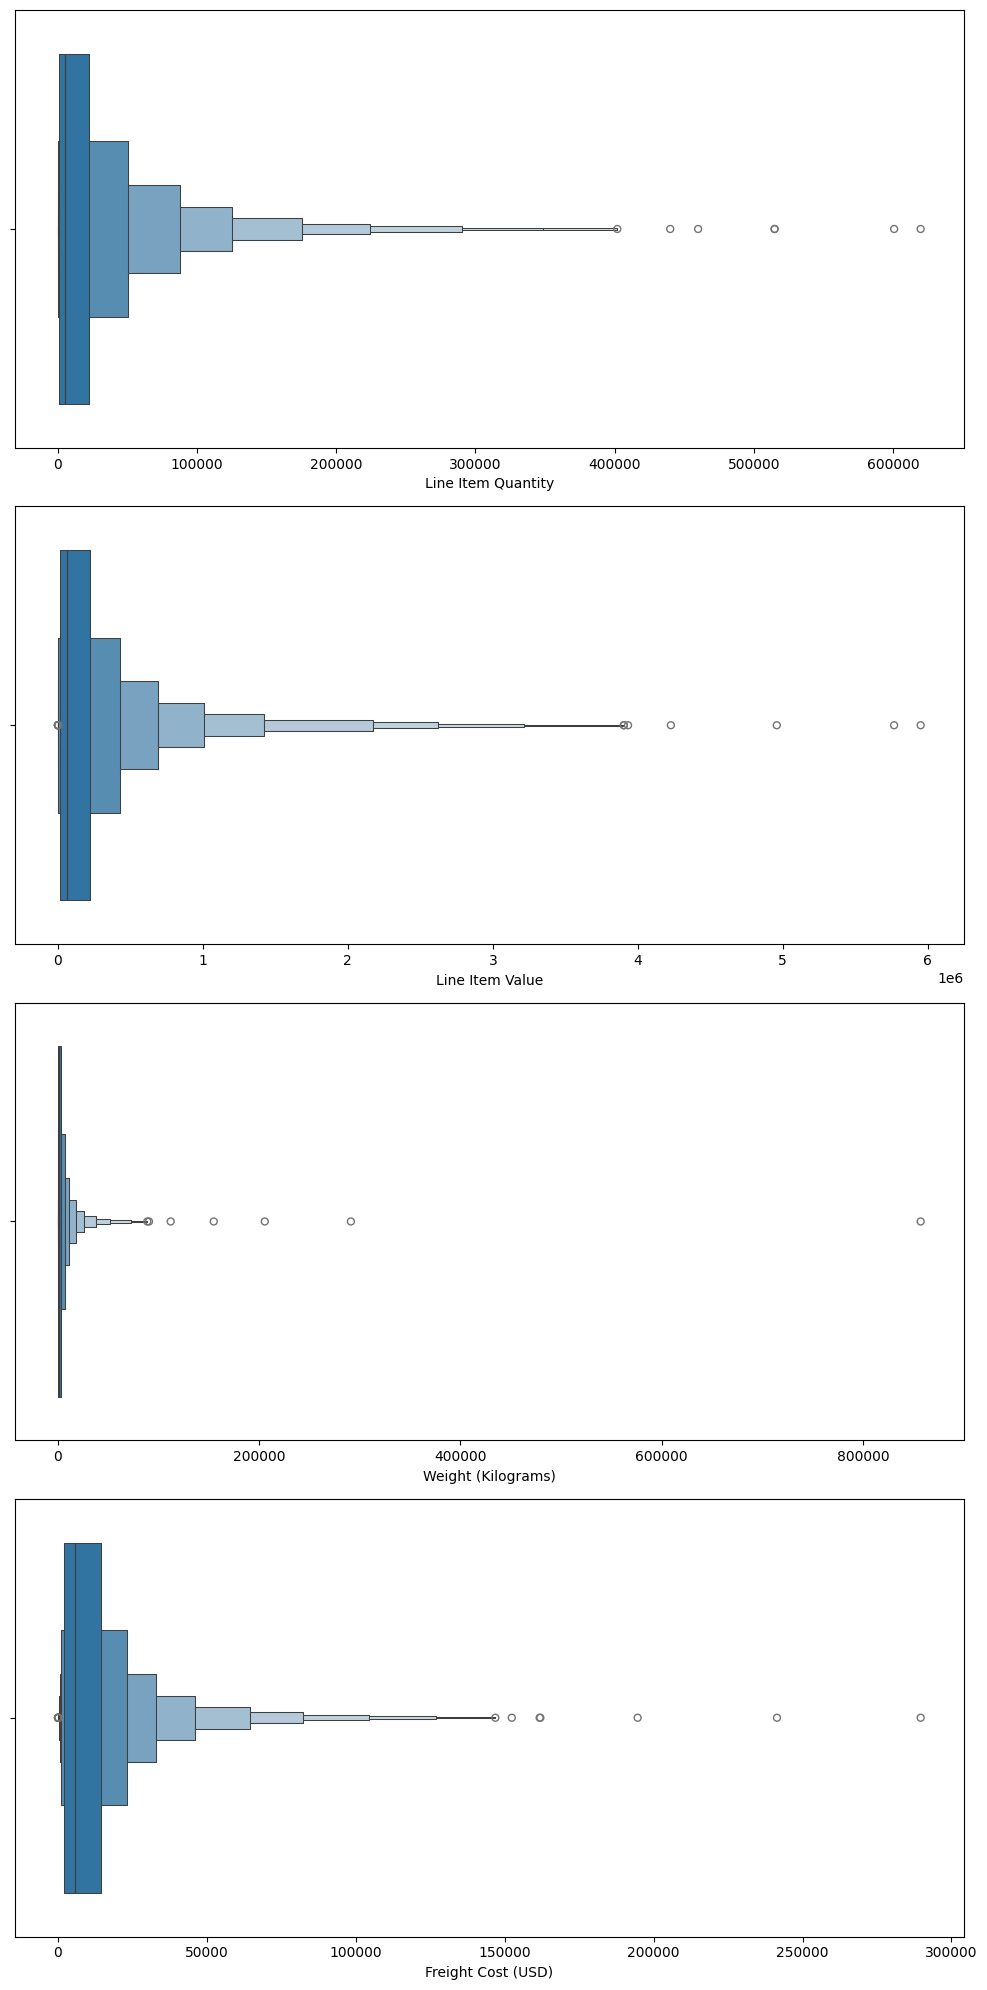

In [28]:
%matplotlib inline
# Iterate directly over numerical columns
fig = plt.figure(figsize=(10, 20)) # Increased figure height to accommodate all plots

num_numerical_cols = len(df.select_dtypes(include=['int64', 'float64']).columns) # Count numerical columns

# Reset index to start from 1 for subplots
index = 1
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if column is numerical
        plt.subplot(num_numerical_cols, 1, index)  # Dynamically adjust subplot grid
        sns.boxenplot(x = df[column])
        plt.xlabel(column)
        # Increment index for the next subplot
        index += 1

plt.tight_layout() # Adjust spacing between subplots to prevent overlap
plt.show()

In [29]:
# deleting outliers using the Inter Quartile Range
for column in numerical_vars:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    iqr_value=Q3-Q1
    lower_bound=Q1-(1.5*iqr_value)
    upper_bound=Q3+(1.5*iqr_value)
    df=df[(df[column]>lower_bound) & (df[column]<upper_bound)]

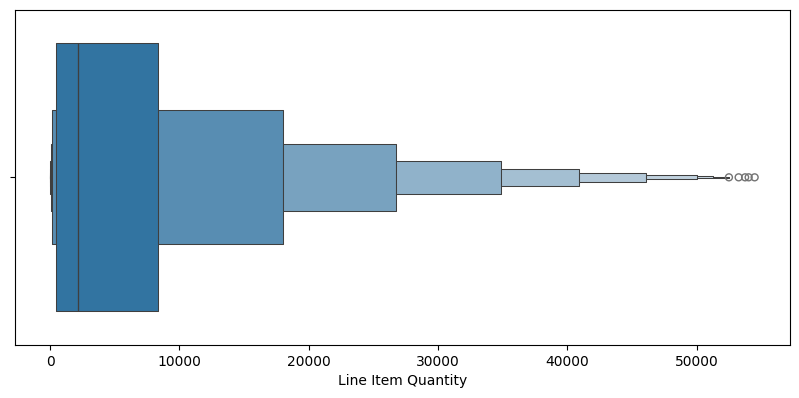

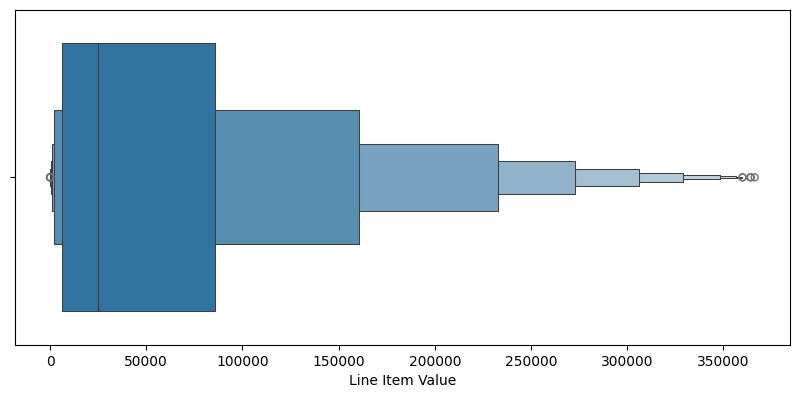

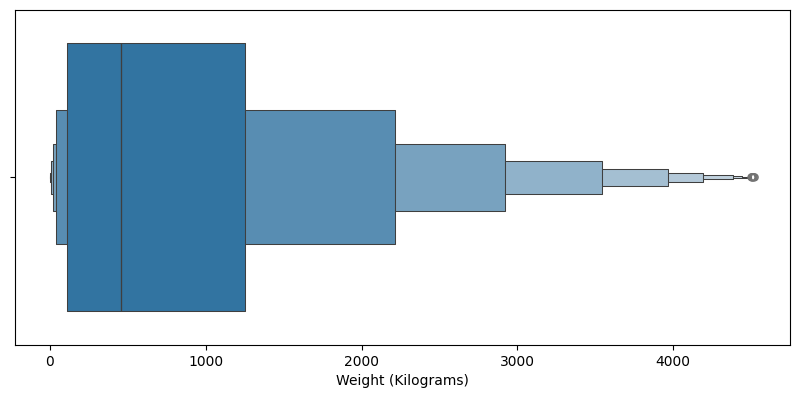

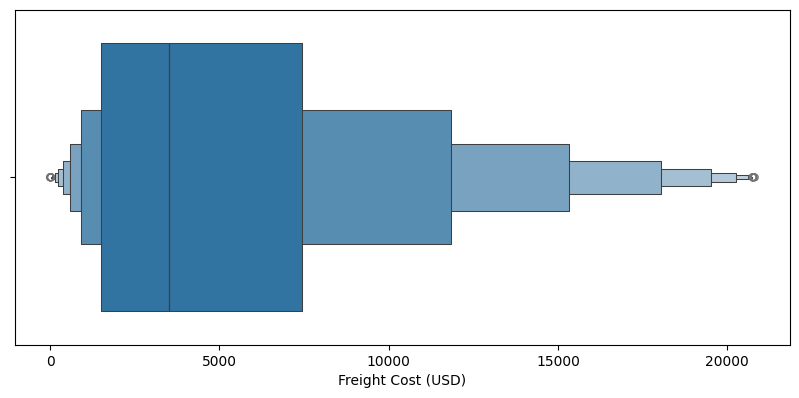

In [30]:
%matplotlib inline
for index,column in enumerate(df[numerical_vars].columns):
    fig=plt.figure(figsize=(10,20))
    plt.subplot(len(numerical_vars),1,index+1)
    sns.boxenplot(x = df[column])
    plt.xlabel(column)


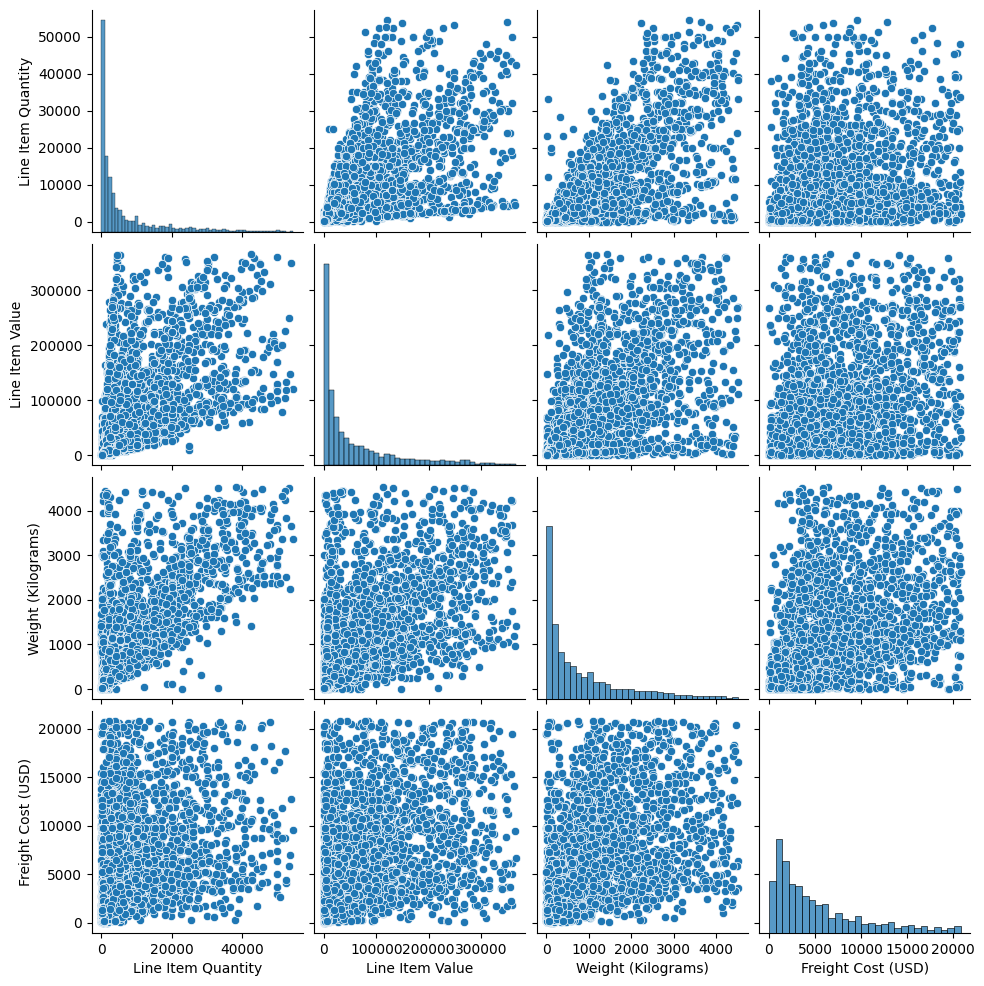

In [31]:
sns.pairplot(df)

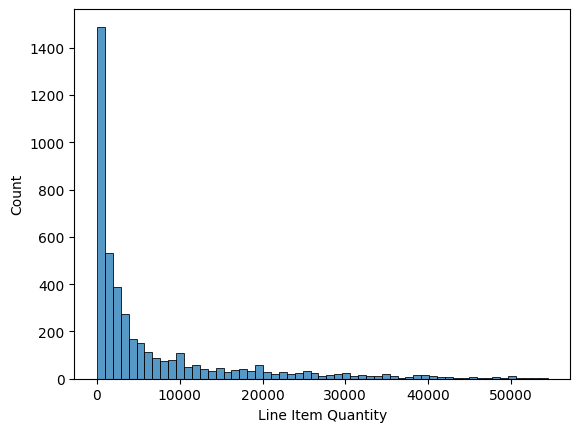

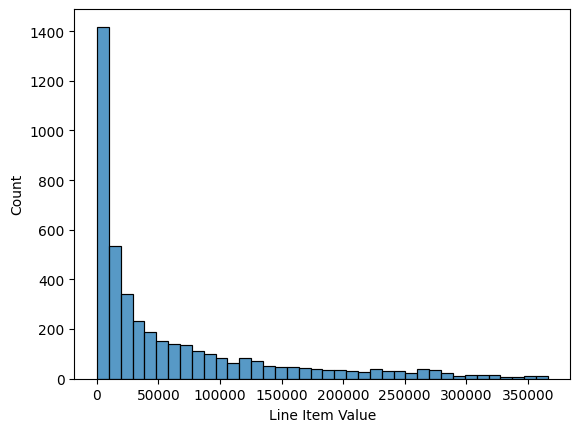

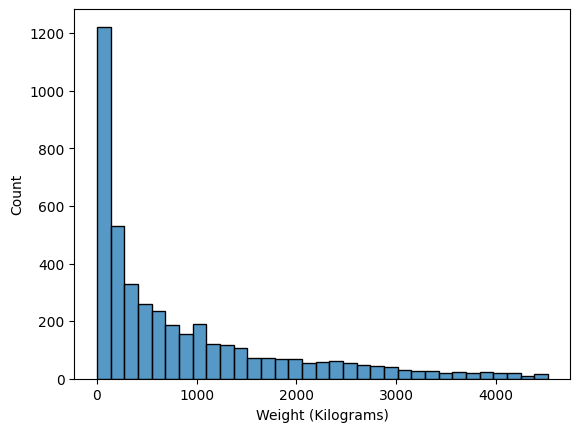

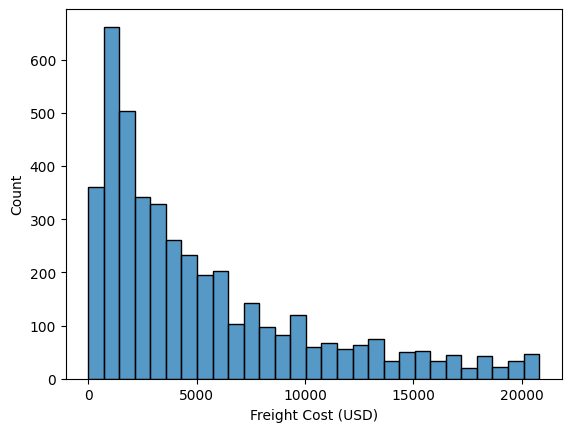

In [32]:
for column in numerical_vars:
    sns.histplot(x = df[column])
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


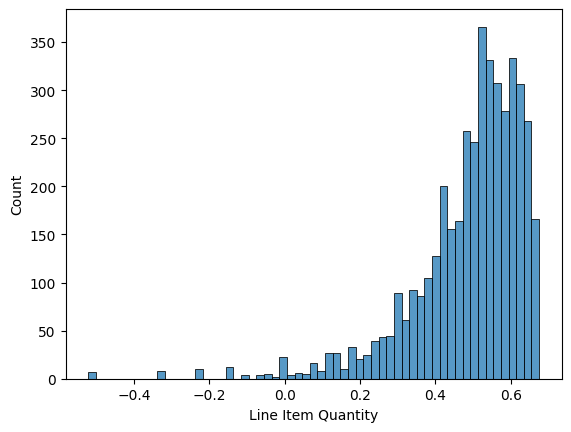

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


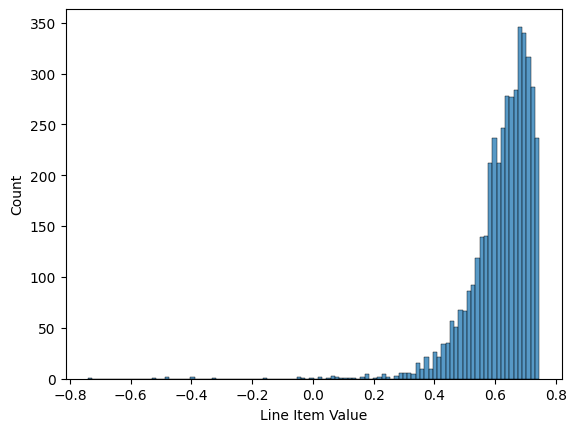

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


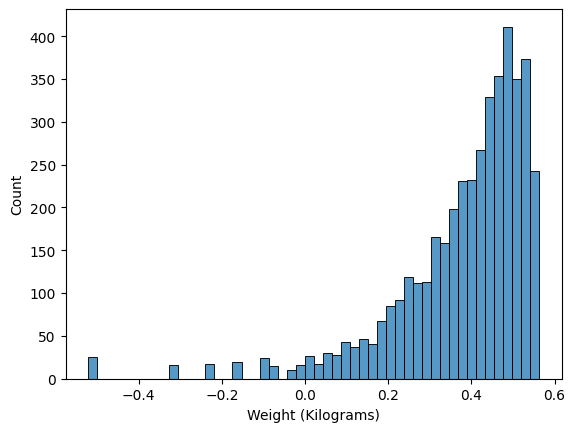

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


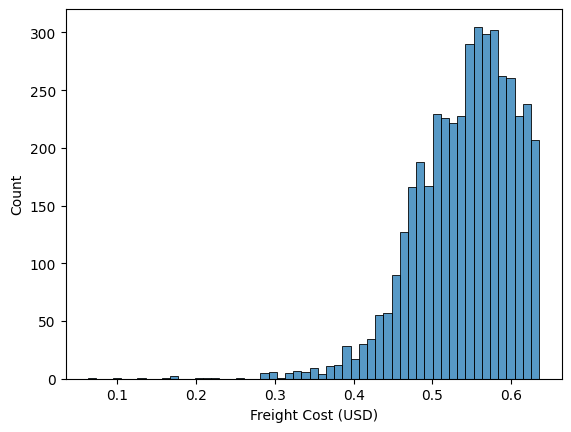

In [36]:
# Log normal distribution
for column in numerical_vars:
    df[column] = np.log10(df[column])
    sns.histplot(x = df[column])
    plt.show()

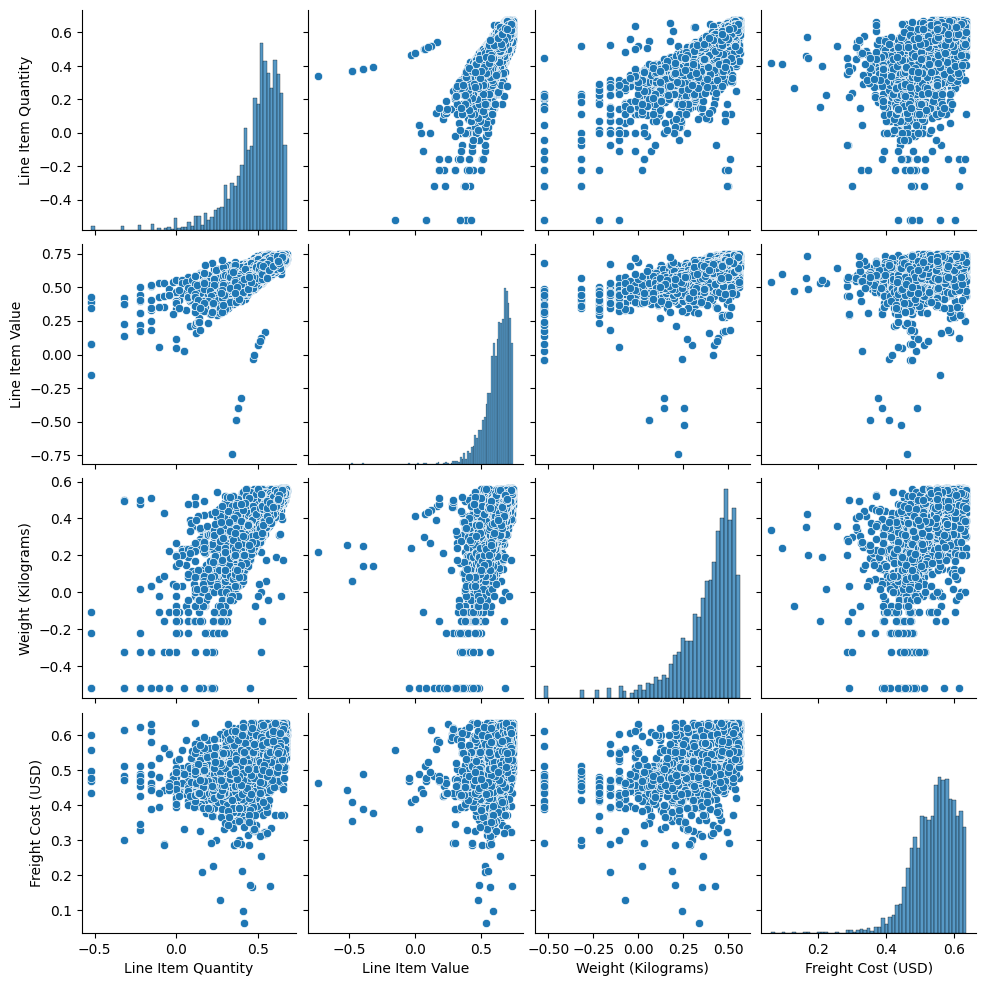

In [37]:
sns.pairplot(df)

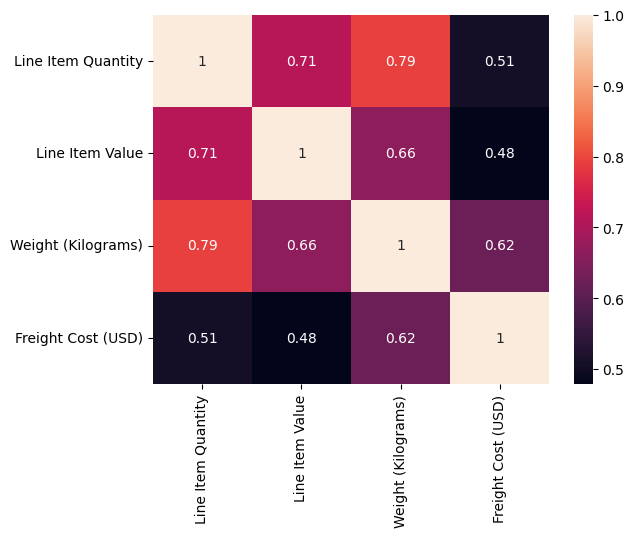

In [40]:
# Correlation heatmap
sns.heatmap(df[numerical_vars].corr(), annot = True)
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4333 entries, 0 to 10316
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Managed By          4333 non-null   object 
 1   Fulfill Via         4333 non-null   object 
 2   Vendor INCO Term    4333 non-null   object 
 3   Shipment Mode       4333 non-null   object 
 4   Product Group       4333 non-null   object 
 5   Sub Classification  4333 non-null   object 
 6   Line Item Quantity  4333 non-null   float64
 7   Line Item Value     4330 non-null   float64
 8   Weight (Kilograms)  4333 non-null   float64
 9   Freight Cost (USD)  4332 non-null   float64
dtypes: float64(4), object(6)
memory usage: 372.4+ KB


# Label Encoding

In [42]:
df.columns

Index(['Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'Product Group', 'Sub Classification', 'Line Item Quantity',
       'Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

In [46]:
# Label Encoding
for column in df.columns:
    if df[column].dtype == "object":
      le = LabelEncoder()
      df[column] = le.fit_transform(df[column])

In [52]:
df["Vendor INCO Term"].unique()

array([5, 6, 1, 3, 0, 4, 7, 2])

# Feature Selection
We are going to use the Chi2 test for feature selection

In [56]:
chi2_features = SelectKBest( chi2,k=3 )

In [61]:
df.dropna(subset=['Freight Cost (USD)'], inplace=True)  # Drop rows with missing values in this column

X_bestfeatures = chi2_features.fit_transform(df[['Fulfill Via', 'Vendor INCO Term', 'Shipment Mode','Product Group', 'Sub Classification']],df[['Freight Cost (USD)']].astype('int64'))

In [62]:
X_bestfeatures


array([[0, 3, 2],
       [0, 2, 5],
       [0, 3, 2],
       ...,
       [3, 2, 1],
       [3, 2, 5],
       [1, 2, 1]])

The top categorical features are Vendor INCO Term,Shipment Mode,Sub Classification as the values of same are present above

# Train Test split

In [65]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(['Freight Cost (USD)','Managed By','Product Group','Fulfill Via'],axis=1),df[['Freight Cost (USD)']],test_size=0.2)

In [66]:
X_train

,Vendor INCO Term,Shipment Mode,Sub Classification,Line Item Quantity,Line Item Value,Weight (Kilograms)
3607,5,0,2,0.539490,0.729682,0.488639
5971,5,0,2,0.418151,0.615344,0.379523
4090,5,2,1,0.558800,0.631801,0.419858
4700,5,0,1,0.633572,0.716797,0.558700
2142,7,0,1,0.631317,0.729027,0.501296
...,...,...,...,...,...,...
7502,7,0,5,0.452949,0.503496,0.426097
5429,1,0,1,0.438924,0.612577,0.220829
4166,5,0,2,0.258377,0.592157,0.139946
1937,7,0,1,0.376616,0.601414,0.234518


K nearest neighbour regressor

In [75]:
# Assuming X_train is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed

# Check for and replace infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)

X_train_imputed = imputer.fit_transform(X_train)

params=[{'n_neighbors':list(range(1,50))}]
knn=KNeighborsRegressor()
cv_knn=GridSearchCV(estimator=knn,param_grid=params)

cv_knn.fit(X_train_imputed, y_train)  # Use the imputed data

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}])

In [76]:
cv_knn.best_params_

{'n_neighbors': 17}

In [78]:
# Assuming X_test is a pandas DataFrame
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# If you want to impute missing values in X_test as well:
X_test_imputed = imputer.transform(X_test)

cv_knn.score(X_test_imputed,y_test) # Use the imputed data if you imputed it above, otherwise use X_test

0.5316848496650721

Random forest regressor

In [ ]:
# Assuming X_train is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed

# Check for and replace infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)

X_train_imputed = imputer.fit_transform(X_train)

# Adjust max_depth range to start from 1
params=[{'n_estimators':[10,20,30,40,50,60,70,80,90,100],'max_depth':list(range(1,21))}]

rf=RandomForestRegressor()

rf_cv=GridSearchCV(estimator=rf,param_grid=params)

# Handle remaining NaNs (choose one of the following methods)

# Method 1: Drop rows with NaNs
X_train_imputed = pd.DataFrame(X_train_imputed).dropna()  # Convert to DataFrame if needed
# Use the .iloc attribute to select rows in y_train based on integer positions
y_train = y_train.iloc[X_train_imputed.index]  # Adjust y_train accordingly

# Method 2: Use a different estimator that handles NaNs
# Example: from sklearn.ensemble import HistGradientBoostingRegressor
# rf = HistGradientBoostingRegressor()

rf_cv.fit(X_train_imputed, y_train)

In [92]:
 # Assuming X_test is a pandas DataFrame
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute missing values in X_test using the same imputer fitted on X_train
X_test_imputed = imputer.transform(X_test)

rf_cv.score(X_test_imputed, y_test) # Use the imputed data for scoring

0.5361967880151098

In [93]:
rf_cv.best_params_

{'max_depth': 8, 'n_estimators': 100}